<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo55-alex-edgar/blob/main/Reto_CienciaAnalisisDatos_Equipo55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto: Ciencia y Análisis de Datos
# Pt1. Limpieza, análisis, visualización y kmeans
# Equipo 55

## Alejandro Juarez Corona A01168444
## Edgar López Valdés A01339939


### Instrucciones

* Limpieza de base de datos.
* Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
  * Identificando tendencias centrales promedio, media y mediana de los datos. 
  * Identificar medidas de dispersión, máximo, mínimo .
  * Identificar medidas de posición no centrales , los cuartiles, outliers.   
  * Identificar correlaciones.
* Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### Se trabaja con el la base de datos de Aguas Profundas 



In [97]:
# Importacion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd

In [67]:
# Obteniendo los datos
original = pd.read_csv('DatabaseAguasSubterraneas2020.csv', encoding='latin1')
df = pd.read_csv('DatabaseAguasSubterraneas2020.csv', encoding='latin1')
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [3]:
# Checking the description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [4]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


/Users/edgar.lopez/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


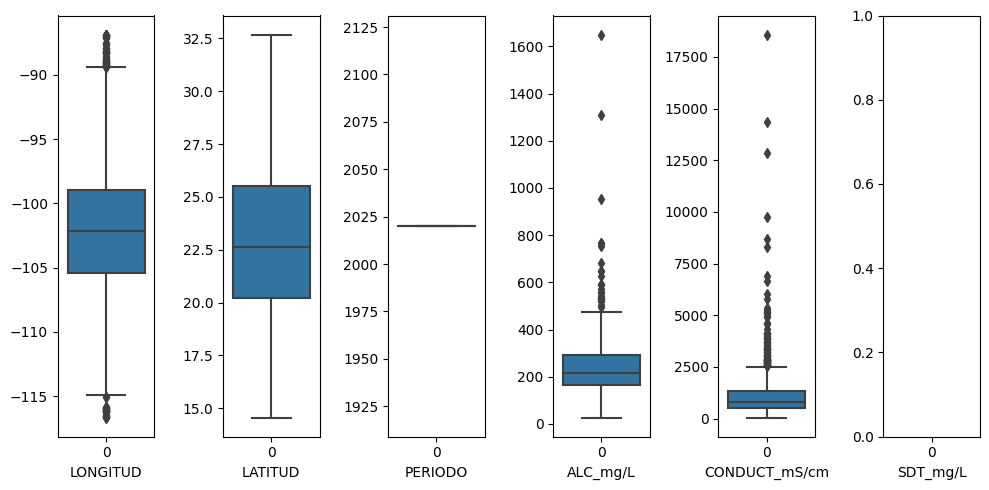

In [5]:
# Plotting the variables bloxplots
plt.rcParams["figure.figsize"] = [10.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 6)
# Numeric data
df_num = df._get_numeric_data() 
for (index, col) in enumerate(df_num.columns.values):
  sns.boxplot(data = df_num[col], ax = axes[index]).set(xlabel=col)

### From the boxplots and the information from the dataframe we can observe that Periodo and SDT_mg/L do not proportionate useful information, we suggest dropping this columns

In [6]:
df.drop(['PERIODO','SDT_mg/L'], axis=1, inplace=True)
columns = df.columns.values

### We observe many rows have a '<' symbol. We can take it out so we can transform the column to numeric

In [7]:
# Checking for original numeric columns
or_col_num = df._get_numeric_data().columns.values
print("Original Numeric Columns:",or_col_num)
# Replacing symbols not allowing conversion
df.replace({'<':''}, regex=True, inplace=True)
columns = df.columns.values
for col in columns:
  try:
    df[col] = df[col].astype('float')
  except:
    pass
print("New Numeric Columns:",df._get_numeric_data().columns.values)

Original Numeric Columns: ['LONGITUD' 'LATITUD' 'ALC_mg/L' 'CONDUCT_mS/cm']
New Numeric Columns: ['LONGITUD' 'LATITUD' 'ALC_mg/L' 'CONDUCT_mS/cm' 'SDT_M_mg/L'
 'FLUORUROS_mg/L' 'DUR_mg/L' 'COLI_FEC_NMP/100_mL' 'N_NO3_mg/L'
 'AS_TOT_mg/L' 'CD_TOT_mg/L' 'CR_TOT_mg/L' 'HG_TOT_mg/L' 'PB_TOT_mg/L'
 'MN_TOT_mg/L' 'FE_TOT_mg/L']


In [8]:
print("Original numeric columns:",len(or_col_num))
print("New numeric columns:",len(df._get_numeric_data().columns.values))

Original numeric columns: 4
New numeric columns: 16


Boxplots

/Users/edgar.lopez/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


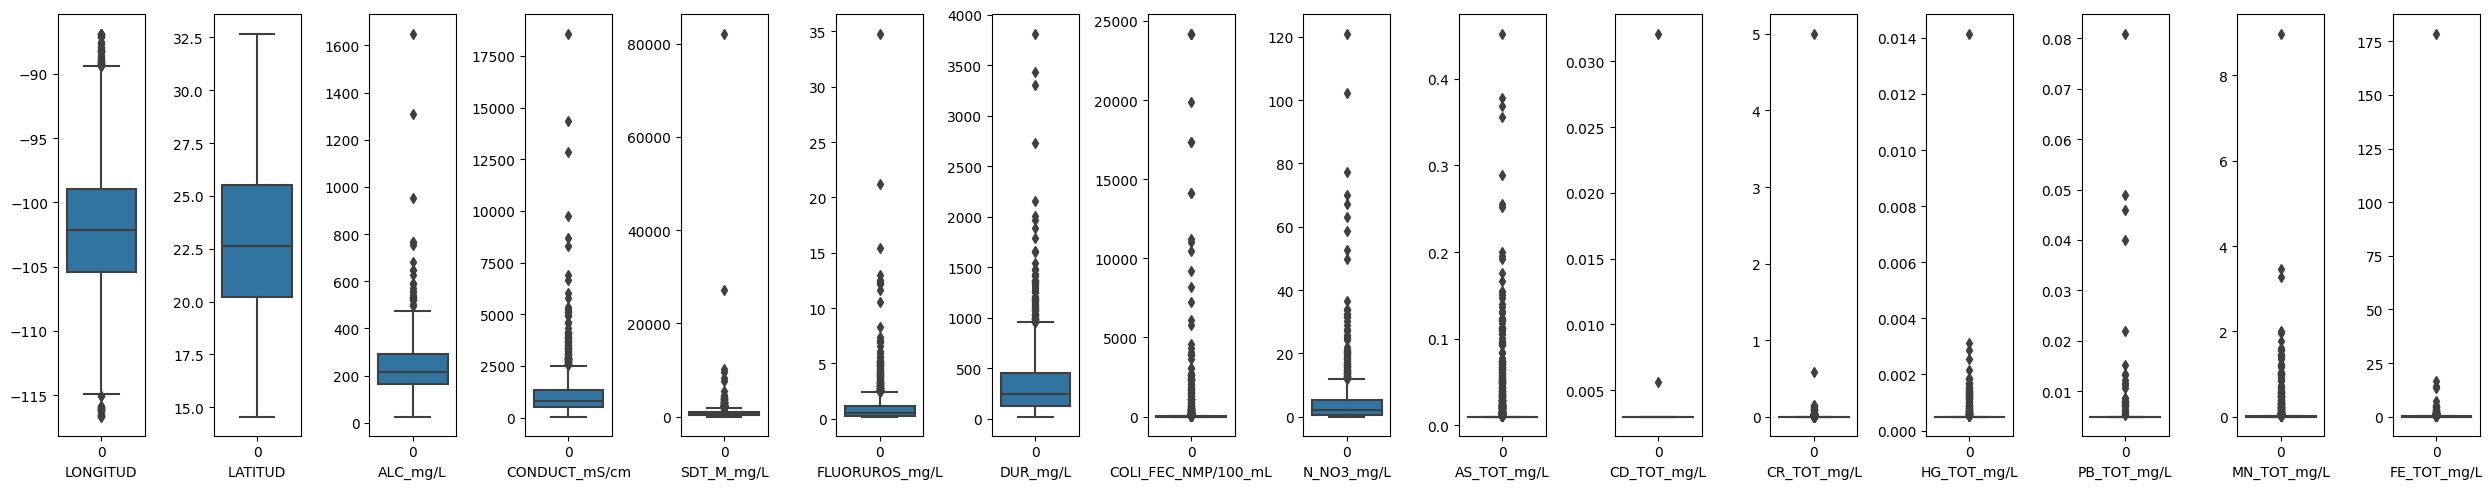

In [9]:
# Plotting the variables bloxplots
plt.rcParams["figure.figsize"] = [25.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 16)
# Numeric data
df_num = df._get_numeric_data() 
for (index, col) in enumerate(df_num.columns.values):
  sns.boxplot(data = df_num[col], ax = axes[index]).set(xlabel=col)

Buscamos valores a reemplazar



In [10]:
# Replacing all empty strings as NaN
df.replace('',np.nan)
# Checking for NaN in database
df.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/L             False
CALIDAD_PB

In [11]:
df1 = df.copy()

df1.dropna(inplace=True)

rows_df = df.shape[0]
rows_df1 = df1.shape[0]

# If we only decide to drop all rows with at least an empty value we would lose a lot of rows
print("Rows lost if dropping for any NaN:",rows_df-rows_df1)

# Dropping rows like that is not a good decision

Rows lost if dropping for any NaN: 441


### Separamos nuestra variable de salida e imputamos los valores vacios con la media

### Un trabajo más avanzado podría ser separar según el valor de SEMAFORO, y obtener la moda, mediana o media de cada categoría para esa columna y usarla para reemplazar ese dato


In [12]:
y = df[['SEMAFORO']]
y


,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [13]:
# Verificamos que ninguna salida esté vacía
y.isnull().any()

SEMAFORO    False
dtype: bool

In [14]:
# Definimos las variables de entrada
df_ok = df.drop(['SEMAFORO'], axis=1)._get_numeric_data()
df_ok

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,-102.20075,21.99958,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,-102.28801,22.36685,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,-102.29449,22.18435,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,-110.24480,23.45138,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,-99.70099,24.78280,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,-99.82249,25.55197,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


In [15]:
# Verificamos si hay datos vacíos en nuestras entradas
df_ok.isna().any()

LONGITUD               False
LATITUD                False
ALC_mg/L                True
CONDUCT_mS/cm           True
SDT_M_mg/L              True
FLUORUROS_mg/L         False
DUR_mg/L                True
COLI_FEC_NMP/100_mL    False
N_NO3_mg/L              True
AS_TOT_mg/L            False
CD_TOT_mg/L            False
CR_TOT_mg/L            False
HG_TOT_mg/L            False
PB_TOT_mg/L            False
MN_TOT_mg/L            False
FE_TOT_mg/L            False
dtype: bool

In [16]:
# Reemplazaremos los datos con la media de la columna

col_ok = df_ok.columns.values
for col in col_ok:
  mean = df_ok[col].mean()
  df_ok[col].replace(np.nan,mean, inplace=True)


In [17]:
# Now check again for rows with null data
df_ok.isna().any()

LONGITUD               False
LATITUD                False
ALC_mg/L               False
CONDUCT_mS/cm          False
SDT_M_mg/L             False
FLUORUROS_mg/L         False
DUR_mg/L               False
COLI_FEC_NMP/100_mL    False
N_NO3_mg/L             False
AS_TOT_mg/L            False
CD_TOT_mg/L            False
CR_TOT_mg/L            False
HG_TOT_mg/L            False
PB_TOT_mg/L            False
MN_TOT_mg/L            False
FE_TOT_mg/L            False
dtype: bool

In [179]:
df_ok['SEMAFORO'] = df['SEMAFORO']

In [180]:
#De acuerdo a la moda la calidad del agua suele ser buena
df_ok['SEMAFORO'].mode()

0    Verde
Name: SEMAFORO, dtype: object

In [37]:
df_ok.mode


<bound method DataFrame.mode of        LONGITUD   LATITUD  ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  \
0    -102.02210  22.20887   229.990          940.0    603.6000   
1    -102.20075  21.99958   231.990          608.0    445.4000   
2    -102.28801  22.36685   204.920          532.0    342.0000   
3    -102.29449  22.18435   327.000          686.0    478.6000   
4    -110.24480  23.45138   309.885         1841.0   1179.0000   
...         ...       ...       ...            ...         ...   
1063  -99.54191  24.76036   231.045         2350.0   1545.8000   
1064  -99.70099  24.78280   256.000          529.0    297.0000   
1065  -99.82249  25.55197   330.690         2600.0   1873.0000   
1066 -100.32683  24.80118   193.140          873.0    690.6667   
1067 -100.73302  25.09380   263.070          817.0    495.0000   

      FLUORUROS_mg/L  DUR_mg/L  COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  \
0             0.9766  213.7320                  1.1    4.184656       0.0161   
1             0

In [32]:
df_ok.mean()

LONGITUD               -101.891007
LATITUD                  23.163618
ALC_mg/L                235.633759
CONDUCT_mS/cm          1138.953013
SDT_M_mg/L              896.101567
FLUORUROS_mg/L            1.075600
DUR_mg/L                347.938073
COLI_FEC_NMP/100_mL     355.490356
N_NO3_mg/L                4.319759
AS_TOT_mg/L               0.019618
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.013276
HG_TOT_mg/L               0.000557
PB_TOT_mg/L               0.005282
MN_TOT_mg/L               0.072478
FE_TOT_mg/L               0.410387
dtype: float64

In [33]:
df_ok.median()

LONGITUD              -102.174180
LATITUD                 22.617190
ALC_mg/L               215.825000
CONDUCT_mS/cm          822.500000
SDT_M_mg/L             551.400000
FLUORUROS_mg/L           0.503500
DUR_mg/L               245.662350
COLI_FEC_NMP/100_mL      1.100000
N_NO3_mg/L               2.082916
AS_TOT_mg/L              0.010000
CD_TOT_mg/L              0.003000
CR_TOT_mg/L              0.005000
HG_TOT_mg/L              0.000500
PB_TOT_mg/L              0.005000
MN_TOT_mg/L              0.001500
FE_TOT_mg/L              0.046960
dtype: float64

In [34]:
df_ok.min()

LONGITUD              -116.66425
LATITUD                 14.56115
ALC_mg/L                26.64000
CONDUCT_mS/cm           50.40000
SDT_M_mg/L              25.00000
FLUORUROS_mg/L           0.20000
DUR_mg/L                20.00000
COLI_FEC_NMP/100_mL      1.10000
N_NO3_mg/L               0.02000
AS_TOT_mg/L              0.01000
CD_TOT_mg/L              0.00300
CR_TOT_mg/L              0.00500
HG_TOT_mg/L              0.00050
PB_TOT_mg/L              0.00500
MN_TOT_mg/L              0.00150
FE_TOT_mg/L              0.02500
dtype: float64

In [35]:
df_ok.max()

LONGITUD                 -86.864120
LATITUD                   32.677713
ALC_mg/L                1650.000000
CONDUCT_mS/cm          18577.000000
SDT_M_mg/L             82170.000000
FLUORUROS_mg/L            34.803300
DUR_mg/L                3810.692200
COLI_FEC_NMP/100_mL    24196.000000
N_NO3_mg/L               121.007813
AS_TOT_mg/L                0.452200
CD_TOT_mg/L                0.032110
CR_TOT_mg/L                5.003200
HG_TOT_mg/L                0.014150
PB_TOT_mg/L                0.080900
MN_TOT_mg/L                8.982000
FE_TOT_mg/L              178.615000
dtype: float64

In [36]:
df_ok.std()

LONGITUD                  6.703263
LATITUD                   3.887670
ALC_mg/L                116.655014
CONDUCT_mS/cm          1242.056683
SDT_M_mg/L             2748.950627
FLUORUROS_mg/L            1.924278
DUR_mg/L                359.500870
COLI_FEC_NMP/100_mL    2052.457014
N_NO3_mg/L                8.341222
AS_TOT_mg/L               0.035209
CD_TOT_mg/L               0.000894
CR_TOT_mg/L               0.154391
HG_TOT_mg/L               0.000467
PB_TOT_mg/L               0.003254
MN_TOT_mg/L               0.376512
FE_TOT_mg/L               5.537974
dtype: float64

<AxesSubplot: >

/Users/edgar.lopez/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


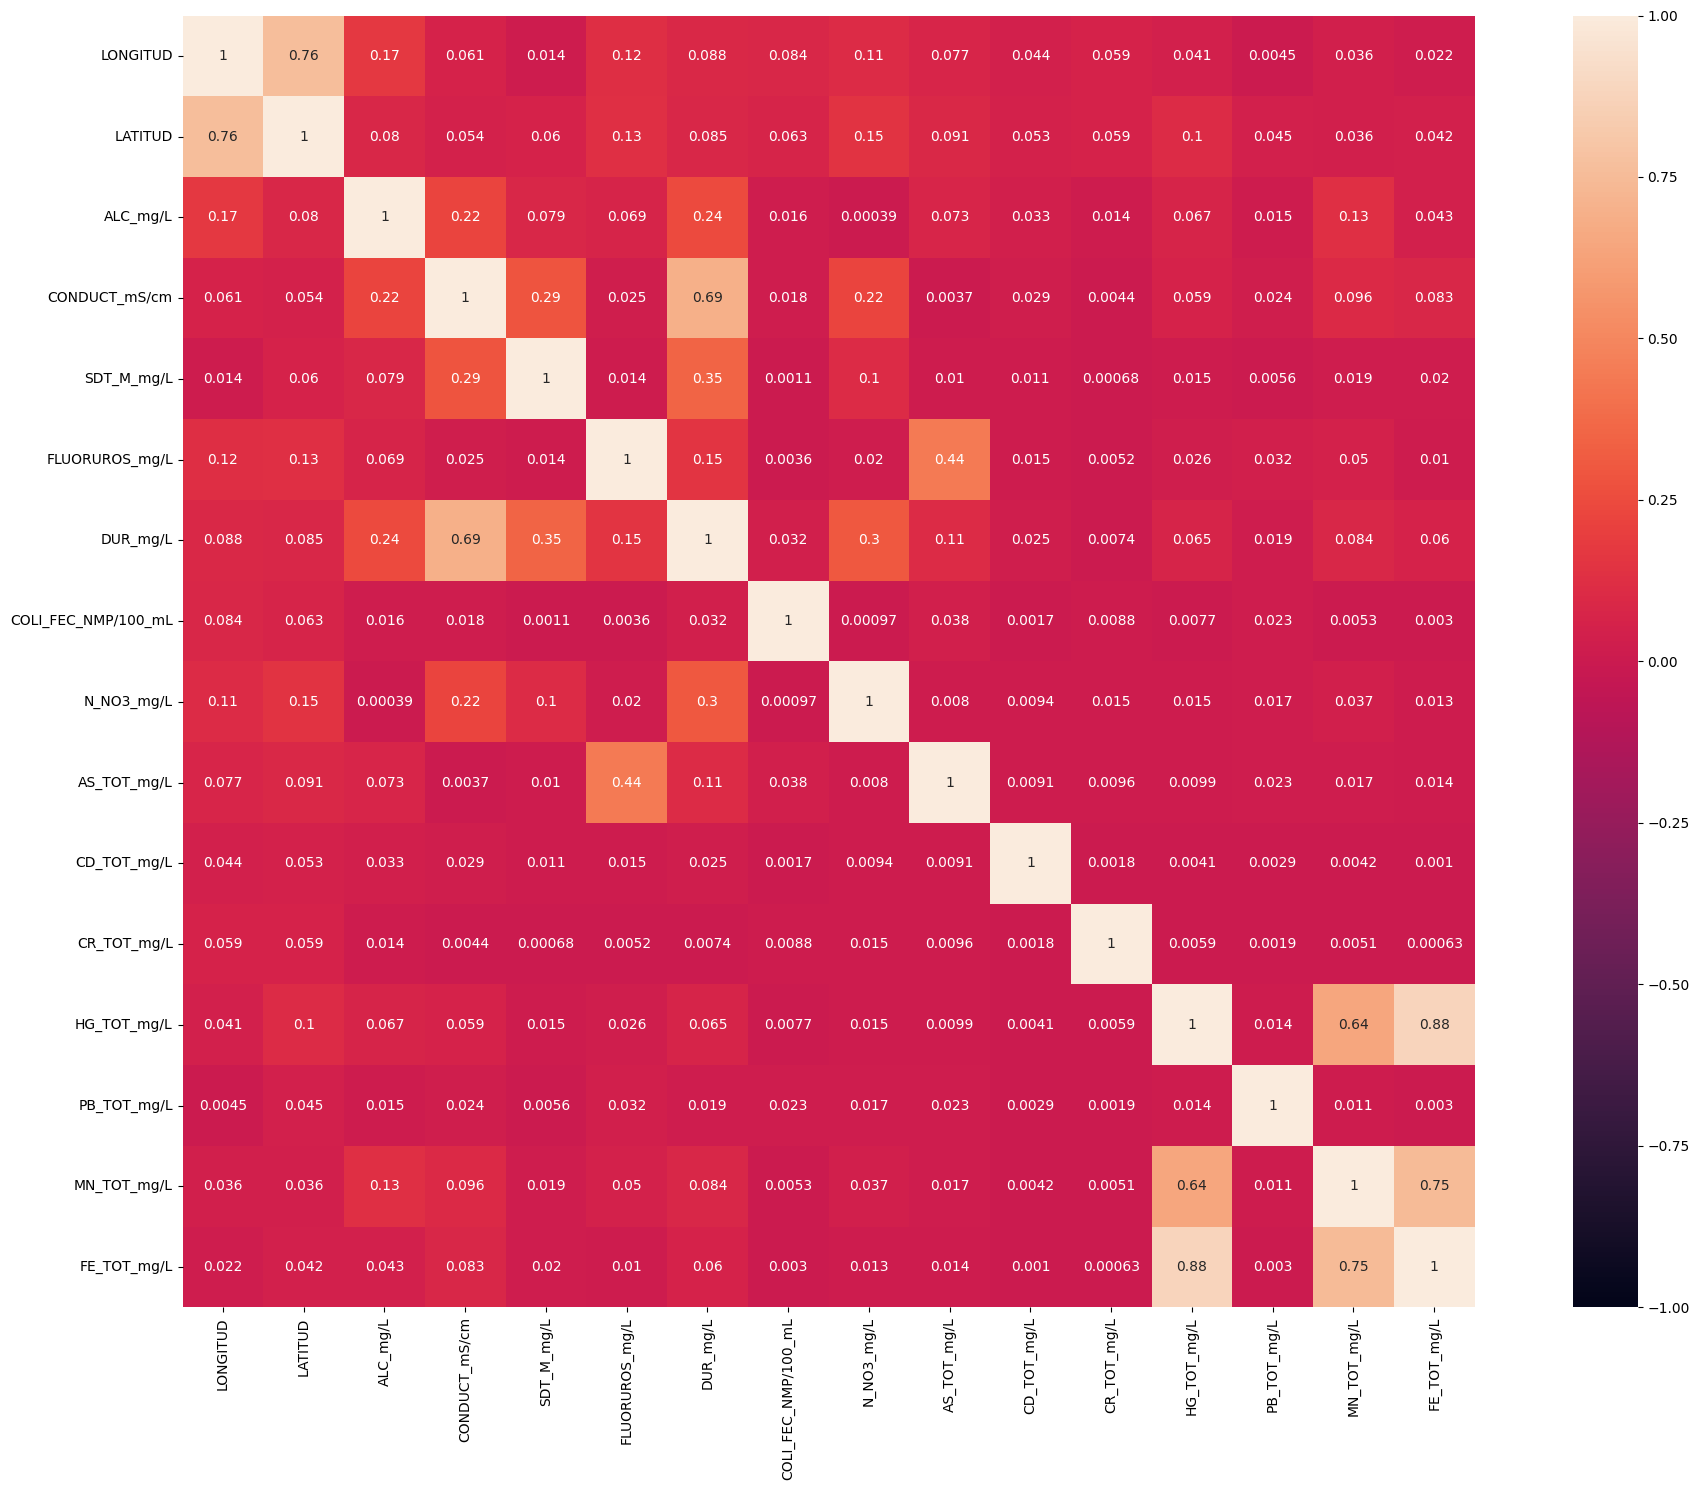

In [18]:
corr = df_ok.corr().abs() 
# Usamos abs para eliminar correlaciones negativas
f, axes = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)

### Los datos están listos para ser usados

In [19]:
df_ok.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387
std,6.703263,3.887670,116.655014,1242.056683,2748.950627,1.924278,359.500870,2052.457014,8.341222,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974
min,-116.664250,14.561150,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.388865,20.212055,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.174180,22.617190,215.825000,822.500000,551.400000,0.503500,245.662350,1.100000,2.082916,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960
75%,-98.974716,25.510285,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


/Users/edgar.lopez/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


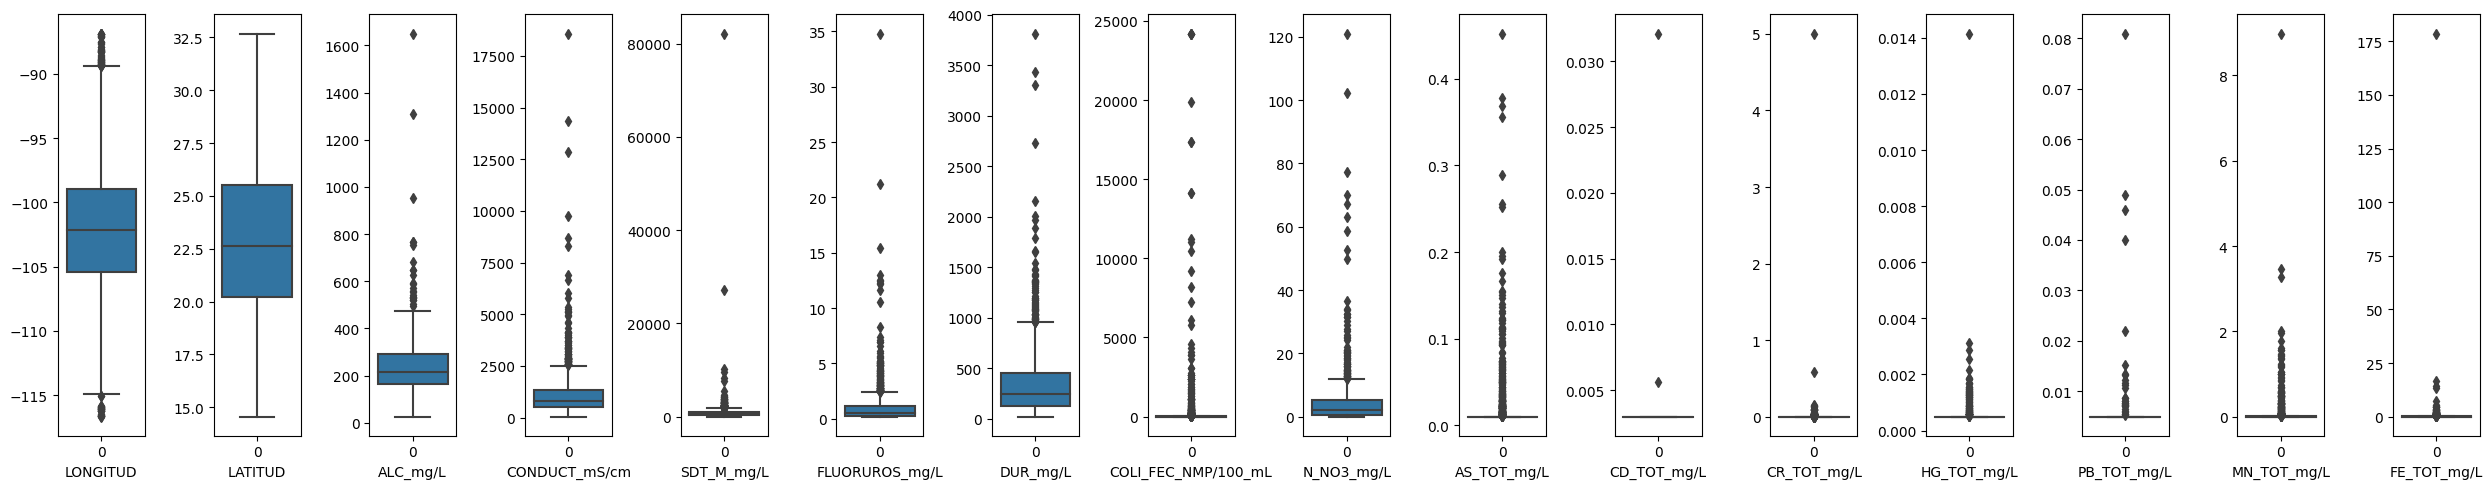

In [20]:
# Plotting the variables bloxplots
plt.rcParams["figure.figsize"] = [25.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 16)
# Numeric data
df_num = df_ok._get_numeric_data() 
for (index, col) in enumerate(df_num.columns.values):
  sns.boxplot(data = df_num[col], ax = axes[index]).set(xlabel=col)

In [40]:
df_ok

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910
1,-102.20075,21.99958,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500
2,-102.28801,22.36685,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500
3,-102.29449,22.18435,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500
4,-110.24480,23.45138,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500
1064,-99.70099,24.78280,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578
1065,-99.82249,25.55197,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290
1066,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860


### K means

In [105]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

In [101]:
x1 = df_ok.LONGITUD
x2 = df_ok.LATITUD
X = list(zip(df_ok.LONGITUD, df_ok.LATITUD))
df_ok["Coordinates"] = list(zip(df_ok.LONGITUD, df_ok.LATITUD))
df_ok["Coordinates"] = df_ok["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_ok, geometry="Coordinates")


In [102]:
#Se hacen pruebas con un rango amplio para determinar si es necesario incluir mas o menos en las pruebas del codo
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
def pruebasDelCodo(range1, range2):
    K = range(range1, range2)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
    
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X))
        inertias.append(kmeanModel.inertia_)
    
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X)
        mapping2[k] = kmeanModel.inertia_
    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

/Users/edgar.lopez/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


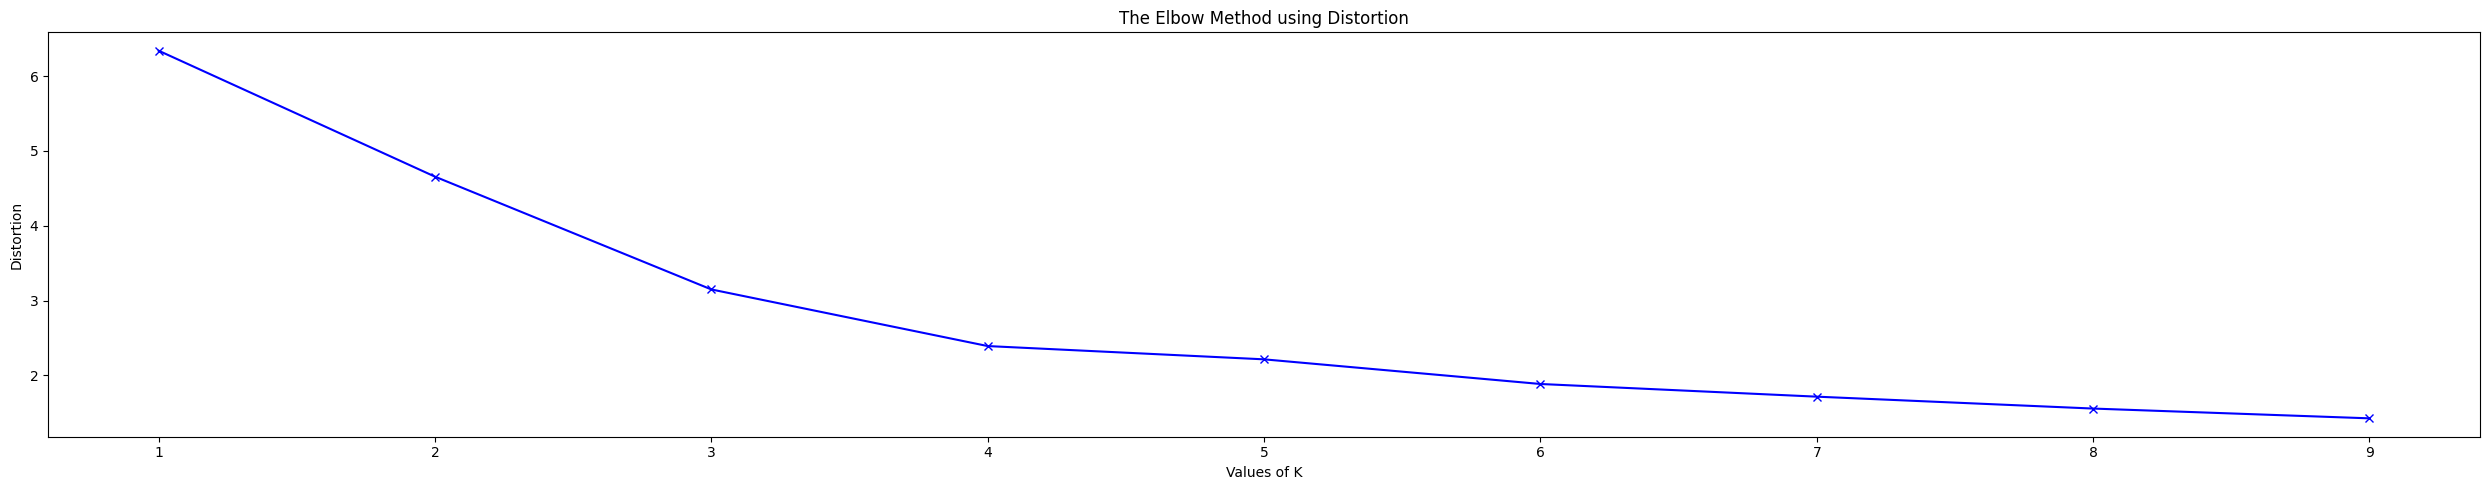

In [103]:
pruebasDelCodo(1,10)

Al realizar la prueba del codo fue posible determinar que el número óptimo de clusters es K=4

In [152]:
#Inicializar objeto Kmeans
kmeans = KMeans(n_clusters= 5)
latlong=df_ok[["LATITUD","LONGITUD"]]
#Predecir las labels
label = kmeans.fit_predict(latlong)
 
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [153]:
#Realizamos k means con los 4 clusters seleccionados sobre la latitud y longitud
kmeans = KMeans(n_clusters=4).fit(X)
kmeansClusters = kmeans.predict(X)
#obtenemos los centros
centers = kmeans.cluster_centers_

In [89]:
kmeansClusters

array([3, 3, 1, ..., 1, 1, 1], dtype=int32)

In [85]:
centers

array([[-100.2286467 ,   20.26114492],
       [ -90.09271578,   19.6502625 ],
       [-111.44537124,   28.7340166 ],
       [-103.66584078,   24.77478631]])

/Users/edgar.lopez/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


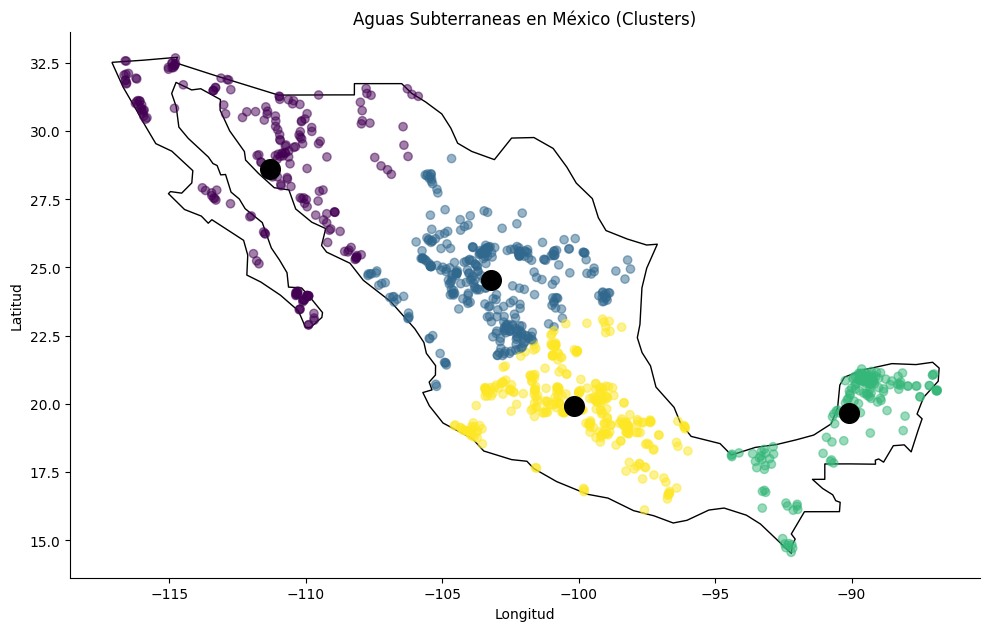

In [156]:
#Vamos a simular el mapa de México y graficar los depositos subterraneos asi como los centros
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, c=kmeansClusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=1)
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Aguas Subterraneas en México (Clusters)')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

In [132]:
centers

array([[ -90.09271578,   19.6502625 ],
       [-103.66798788,   24.78413218],
       [-111.44537124,   28.7340166 ],
       [-100.23589728,   20.26513862]])

In [141]:
#Vamos a buscar la locacion de los centros que vimos en el mapa de México y después haremos un análisis por locacion
from geopy.geocoders import Nominatim
 

geoLoc = Nominatim(user_agent="GetLoc")


locname = geoLoc.reverse("19.6502625,-90.09271578")
print(locname.address)
locname = geoLoc.reverse("24.78413218,-103.66798788")
print(locname.address)
locname = geoLoc.reverse("28.7340166,-111.44537124")
print(locname.address)
locname = geoLoc.reverse("20.26513862,-100.23589728")
print(locname.address)

Municipio de Campeche, Campeche, México
Cuencamé, Durango, México
Granja el Charro, Hermosillo, Sonora, México
Amealco de Bonfil, Querétaro, México


Descubrimos que los centros están en Campeche, Durango, Sonora y Querétaro. Trataremos de determinar la calidad del agua en estos estados y despues en zonas aledañas.

In [163]:
len(kmeansClusters)

1068

In [165]:
len(df_ok)

1068

In [187]:
#Create one df for each cluster to graph
df_ok['Cluster'] = kmeansClusters
df_ok['ESTADO'] = df['ESTADO']


In [189]:
df1 = df_ok[df_ok['Cluster'] == 0]
df2 = df_ok[df_ok['Cluster'] == 1]
df3 = df_ok[df_ok['Cluster'] == 2]
df4 = df_ok[df_ok['Cluster'] == 3]

In [191]:

# Vemos los estados que componen cada cluster
print('Cluster Norte OESTE')
print(df1['ESTADO'].unique())

print('Cluster Norte CENTRO')
print(df2['ESTADO'].unique())

print('Cluster Sur')
print(df3['ESTADO'].unique())

print('Cluster Centro')
print(df4['ESTADO'].unique())

Cluster Norte OESTE
['BAJA CALIFORNIA SUR' 'CHIHUAHUA' 'SONORA' 'BAJA CALIFORNIA' 'SINALOA']
Cluster Norte CENTRO
['AGUASCALIENTES' 'CHIHUAHUA' 'COAHUILA DE ZARAGOZA' 'DURANGO' 'NAYARIT'
 'SAN LUIS POTOSI' 'ZACATECAS' 'TAMAULIPAS' 'JALISCO' 'SINALOA'
 'NUEVO LEON']
Cluster Sur
['CAMPECHE' 'QUINTANA ROO' 'TABASCO' 'CHIAPAS'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'YUCATAN']
Cluster Centro
['COLIMA' 'MEXICO' 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'AGUASCALIENTES'
 'MICHOACAN DE OCAMPO' 'PUEBLA' 'QUERETARO ARTEAGA' 'SAN LUIS POTOSI'
 'TLAXCALA' 'ZACATECAS' 'DISTRITO FEDERAL' 'MORELOS' 'OAXACA'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'TAMAULIPAS' 'JALISCO']


In [192]:
print(df1['SEMAFORO'].mode())
print(df2['SEMAFORO'].mode())
print(df3['SEMAFORO'].mode())
print(df4['SEMAFORO'].mode())

0    Verde
Name: SEMAFORO, dtype: object
0    Rojo
Name: SEMAFORO, dtype: object
0    Amarillo
Name: SEMAFORO, dtype: object
0    Verde
Name: SEMAFORO, dtype: object


Vemos que la región de baja california en el primer cluster con centro en sonora presentan la mejor calidad de agua,cluster sur tiene calidad intermedia, mientras la zona centro presenta calidad verde en la mayor parte de los sitios, finalmente la zona norte presenta la peor calidad del agua con moda de Semaforo en rojo, hagamos una gráfica de barras para visualizar esto.

In [197]:
count1 = df1.groupby('SEMAFORO')['SEMAFORO'].count()
count2= df2.groupby('SEMAFORO')['SEMAFORO'].count()
count3=df3.groupby('SEMAFORO')['SEMAFORO'].count()
count4=df4.groupby('SEMAFORO')['SEMAFORO'].count()

En una análisis más profundo vemos que la moda no es un buen indicador ya que
por ejemplo en la zona centro el valor predominante es el verde, sin embargo, el número de rojo también es muy alto, por lo que
podemos concluir que la calidad del agua no es buena en realidad.

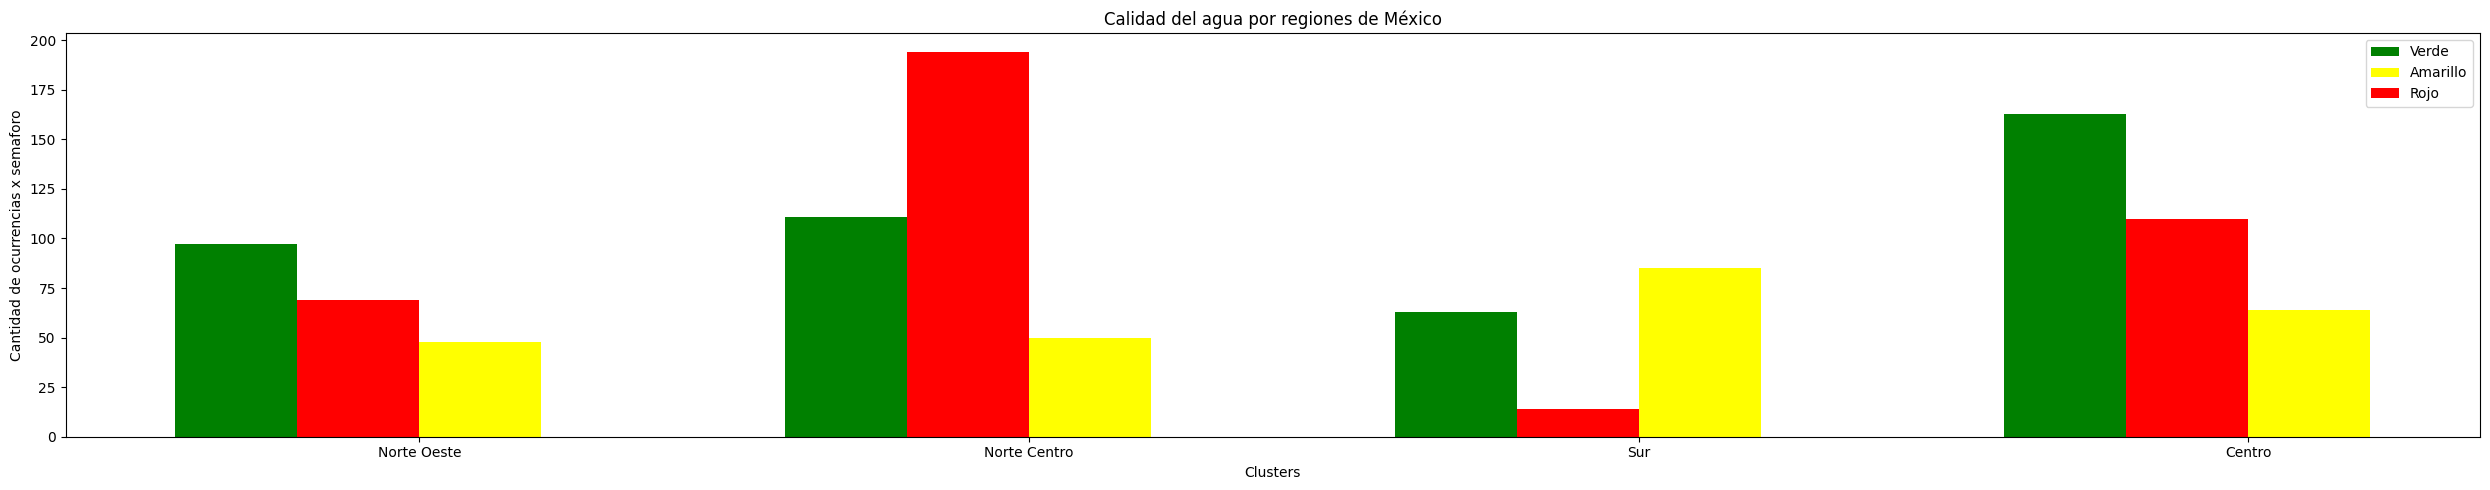

In [232]:
X = ['Norte Oeste','Norte Centro','Sur','Centro']

Verde = [count1.Verde,count2.Verde,count3.Verde,count4.Verde]
Amarillo = [count1.Amarillo,count2.Amarillo,count3.Amarillo,count4.Amarillo]
Rojo = [count1.Rojo,count2.Rojo,count3.Rojo,count4.Rojo]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, Verde, 0.2, color=["green"], label = 'Verde')
plt.bar(X_axis + 0.1, Amarillo, 0.2, color=["yellow"],label = 'Amarillo')
plt.bar(X_axis - 0.1, Rojo, 0.2, color=["red"], label = 'Rojo')

plt.xticks(X_axis, X)
plt.xlabel("Clusters")
plt.ylabel("Cantidad de ocurrencias x semaforo")
plt.title("Calidad del agua por regiones de México")
plt.legend()
plt.show()

Determinamos que sí existe una relación entre la ubicación y la calidad del agua, podemos observar que en los clusters más al norte existen comportamientos similares, aunque en la zona centro norte la calidad del agua es muy mala en algunos puntos, podemos pensar que esto está relacionado a la grandes ciudades industriales, mismo caso con la zona centro, si bien las regiones rurales presentan calidad intermedia o buena del agua, podemos asumir que las zonas con más densidad poblacional representan el factor rojo. Mientras que la zona sur (cabe mencionar que es la que presenta mayor vegetación del país) tiene los valores más altos de calidad buena e intermedia, mientras que presenta pocos puntos con mala calidad.